<a href="https://colab.research.google.com/github/ankesh86/RecommendationSystems/blob/main/Clustering_based_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import seaborn as sns
import os

from sklearn import preprocessing

In [2]:
df_order = pd.read_excel("Rec_sys_data.xlsx")

#read customer dataset
df_customer = pd.read_excel("Rec_sys_data.xlsx", sheet_name='customer')

df_product = pd.read_excel("Rec_sys_data.xlsx", sheet_name='product')

In [3]:
#viewing top 5 rows
print(df_order.head())
print(df_customer.head())
print(df_product.head())


   InvoiceNo StockCode  Quantity         InvoiceDate        DeliveryDate  \
0     536365    84029E         6 2010-12-01 08:26:00 2010-12-02 08:26:00   
1     536365     71053         6 2010-12-01 08:26:00 2010-12-02 08:26:00   
2     536365     21730         6 2010-12-01 08:26:00 2010-12-03 08:26:00   
3     536365    84406B         8 2010-12-01 08:26:00 2010-12-03 08:26:00   
4     536365     22752         2 2010-12-01 08:26:00 2010-12-04 08:26:00   

   Discount%        ShipMode  ShippingCost  CustomerID  
0       0.20      ExpressAir         30.12       17850  
1       0.21      ExpressAir         30.12       17850  
2       0.56     Regular Air         15.22       17850  
3       0.30     Regular Air         15.22       17850  
4       0.57  Delivery Truck          5.81       17850  
   CustomerID  Gender  Age  Income  Zipcode Customer Segment
0       13089    male   53    High     8625   Small Business
1       15810  female   22     Low    87797   Small Business
2       15556  fem

# **Pre-processing the data**

In [4]:
#function to check missing values
def missing_zero_values_table(df):
  zero_val = (df == 0.00).astype(int).sum(axis=0)
  mis_val = df.isnull().sum()
  mis_val_percent = 100*df.isnull().sum() / len(df)
  mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
  mz_table = mz_table.rename(
      columns={0: 'Zero Values', 1:'Missing Values', 2 : '% of total values'}
  )

  mz_table['Total Zero Missing values'] = mz_table['Zero Values'] +  mz_table['Missing Values']
  mz_table['% Total Zero Missing values'] = 100 * mz_table['Total Zero Missing values'] / len(df)

  mz_table['Data Type'] = df.dtypes
  mz_table = mz_table[
      mz_table.iloc[:,1] != 0].sort_values(
          '% of total values', ascending=False).round(1)
  print("Your selected dataframe has "+ str(df.shape[1]) + "columns and "+str(df.shape[0]) +"Rows.\n There are "+ str(mz_table.shape[0]) + " columns that have missing values.")

  mz_table.to_excel('missing_and_zero_values.xlsx', freeze_panes=(1,0), index=False)

  return mz_table


In [5]:
missing_zero_values_table(df_customer)

Your selected dataframe has 6columns and 4372Rows.
 There are 0 columns that have missing values.


,Zero Values,Missing Values,% of total values,Total Zero Missing values,% Total Zero Missing values,Data Type


# **EDA**

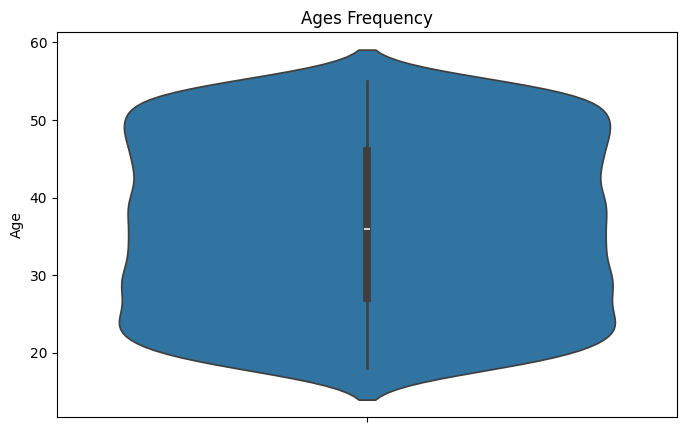

In [6]:
#count of age category
plt.figure(figsize=(8,5))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df_customer['Age'])
plt.show()

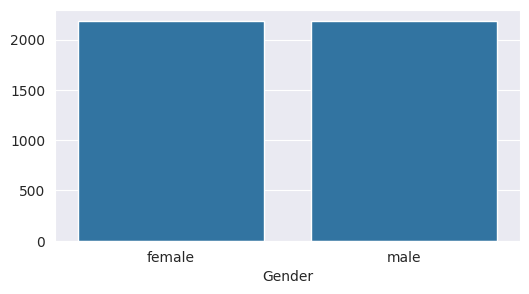

In [7]:
#count of gender
genders = df_customer.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(6,3))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

<ipython-input-8-bdd18b17a7cd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket")


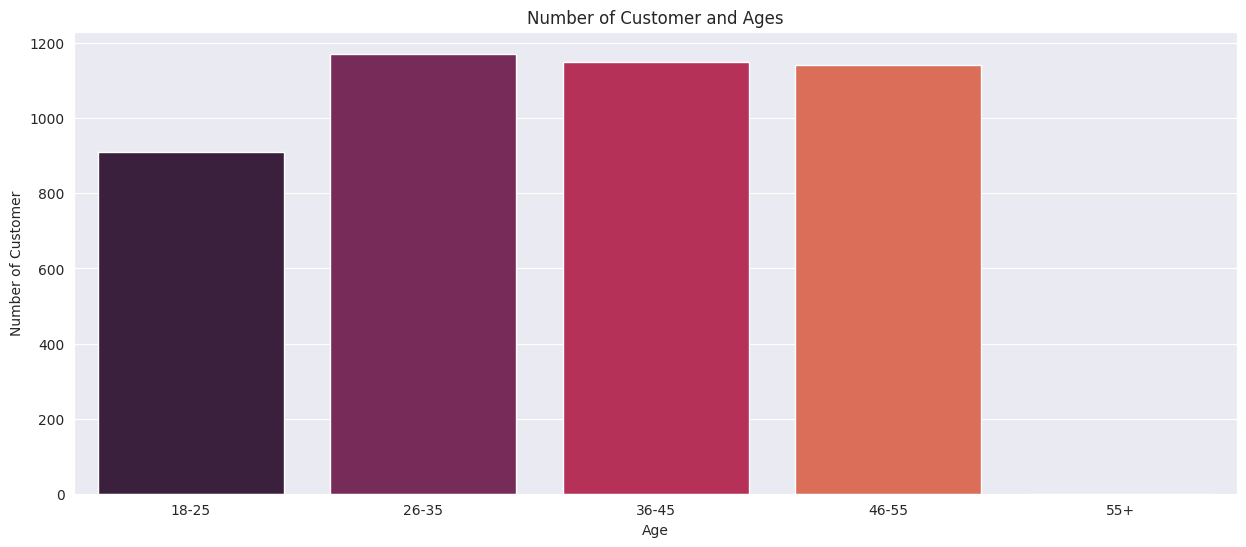

In [8]:
#age buckets agains number of customers
age18_25 = df_customer.Age[(df_customer.Age <= 25) & (df_customer.Age>= 18)]
age26_35 = df_customer.Age[(df_customer.Age <= 35) & (df_customer.Age>= 26)]
age36_45 = df_customer.Age[(df_customer.Age <= 45) & (df_customer.Age>= 36)]
age46_55 = df_customer.Age[(df_customer.Age <= 55) & (df_customer.Age>= 46)]
age55above = df_customer.Age[(df_customer.Age>= 56)]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

### **Label encoding**

In [9]:
#label encoding
gender_encoder = preprocessing.LabelEncoder()
segment_encoder = preprocessing.LabelEncoder()
income_encoder = preprocessing.LabelEncoder()

df_customer['age'] = df_customer['Age']
df_customer['gender'] = gender_encoder.fit_transform(df_customer['Gender'])
df_customer['customer_segment'] = segment_encoder.fit_transform(df_customer['Customer Segment'])
df_customer['income_segment'] = segment_encoder.fit_transform(df_customer['Income'])

print("gender encoder", df_customer['gender'].unique())
print("segment encoder", df_customer['customer_segment'].unique())
print("income encoder", df_customer['income_segment'].unique())

df_customer.iloc[:,6:]

gender encoder [1 0]
segment encoder [2 0 1]
income encoder [0 1 2]


,age,gender,customer_segment,income_segment
0,53,1,2,0
1,22,0,2,1
2,29,0,0,0
3,29,1,1,2
4,36,1,2,1
...,...,...,...,...
4367,22,0,0,0
4368,23,1,1,0
4369,40,1,1,2
4370,37,1,1,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

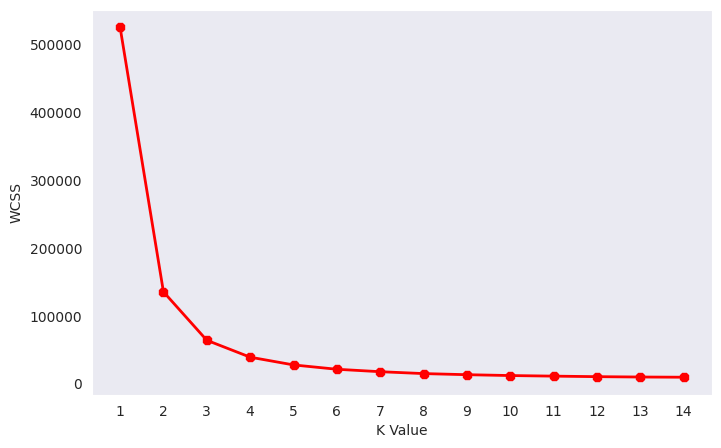

In [10]:
#elbow method
wcss = []
for k in range(1,15):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(df_customer.iloc[:,6:])
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,15), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()


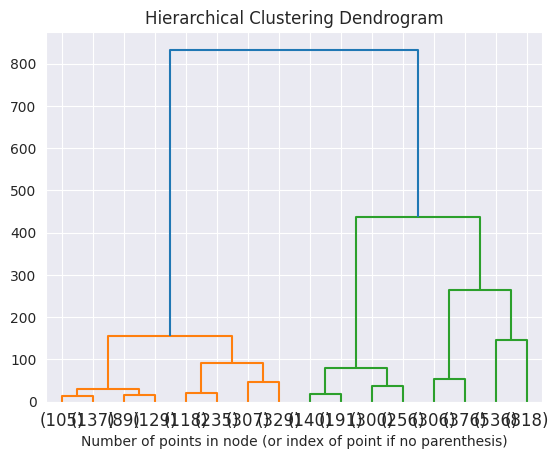

In [12]:
# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the count of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Setting distance_threshold=0 ensures we complete the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Assuming df_customer is your DataFrame
model = model.fit(df_customer.iloc[:, 6:])
plt.title("Hierarchical Clustering Dendrogram")

# Plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()

In [13]:
#building the k-means algo considering 15 clusters

#K-means
km = KMeans(n_clusters=15)
clusters = km.fit_predict(df_customer.iloc[:,6:])

#saving the prediction back to raw dataset
df_customer['cluster'] = clusters

df_customer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Income,Zipcode,Customer Segment,age,gender,customer_segment,income_segment,cluster
0,13089,male,53,High,8625,Small Business,53,1,2,0,3
1,15810,female,22,Low,87797,Small Business,22,0,2,1,1
2,15556,female,29,High,29257,Corporate,29,0,0,0,4
3,13137,male,29,Medium,97818,Middle class,29,1,1,2,4
4,16241,male,36,Low,79200,Small Business,36,1,2,1,9
...,...,...,...,...,...,...,...,...,...,...,...
4367,17763,female,22,High,57980,Corporate,22,0,0,0,12
4368,16078,male,23,High,38622,Middle class,23,1,1,0,1
4369,13270,male,40,Medium,57985,Middle class,40,1,1,2,6
4370,15562,male,37,Medium,91274,Middle class,37,1,1,2,0


In [14]:
df_customer = df_customer[['CustomerID','Gender','Age','Income','Zipcode','Customer Segment','cluster']]

df_customer

,CustomerID,Gender,Age,Income,Zipcode,Customer Segment,cluster
0,13089,male,53,High,8625,Small Business,3
1,15810,female,22,Low,87797,Small Business,1
2,15556,female,29,High,29257,Corporate,4
3,13137,male,29,Medium,97818,Middle class,4
4,16241,male,36,Low,79200,Small Business,9
...,...,...,...,...,...,...,...
4367,17763,female,22,High,57980,Corporate,12
4368,16078,male,23,High,38622,Middle class,1
4369,13270,male,40,Medium,57985,Middle class,6
4370,15562,male,37,Medium,91274,Middle class,0


In [17]:
def plotting_percentages(df, col, target):
    x, y = col, target
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    order_list = list(df[col].unique())
    order_list.sort()

    # Plotting
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=temp_df, height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0, 100)

    for p in g.ax.patches:
        txt = f'{float(p.get_height()):.1f}%'
        txt_x = p.get_x() + p.get_width() / 2.0
        txt_y = p.get_height()
        g.ax.text(txt_x, txt_y, txt, ha='center', va='bottom')

    # Set label and title
    plt.title(f'{col.title()} By Percentage {target.title()}', fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

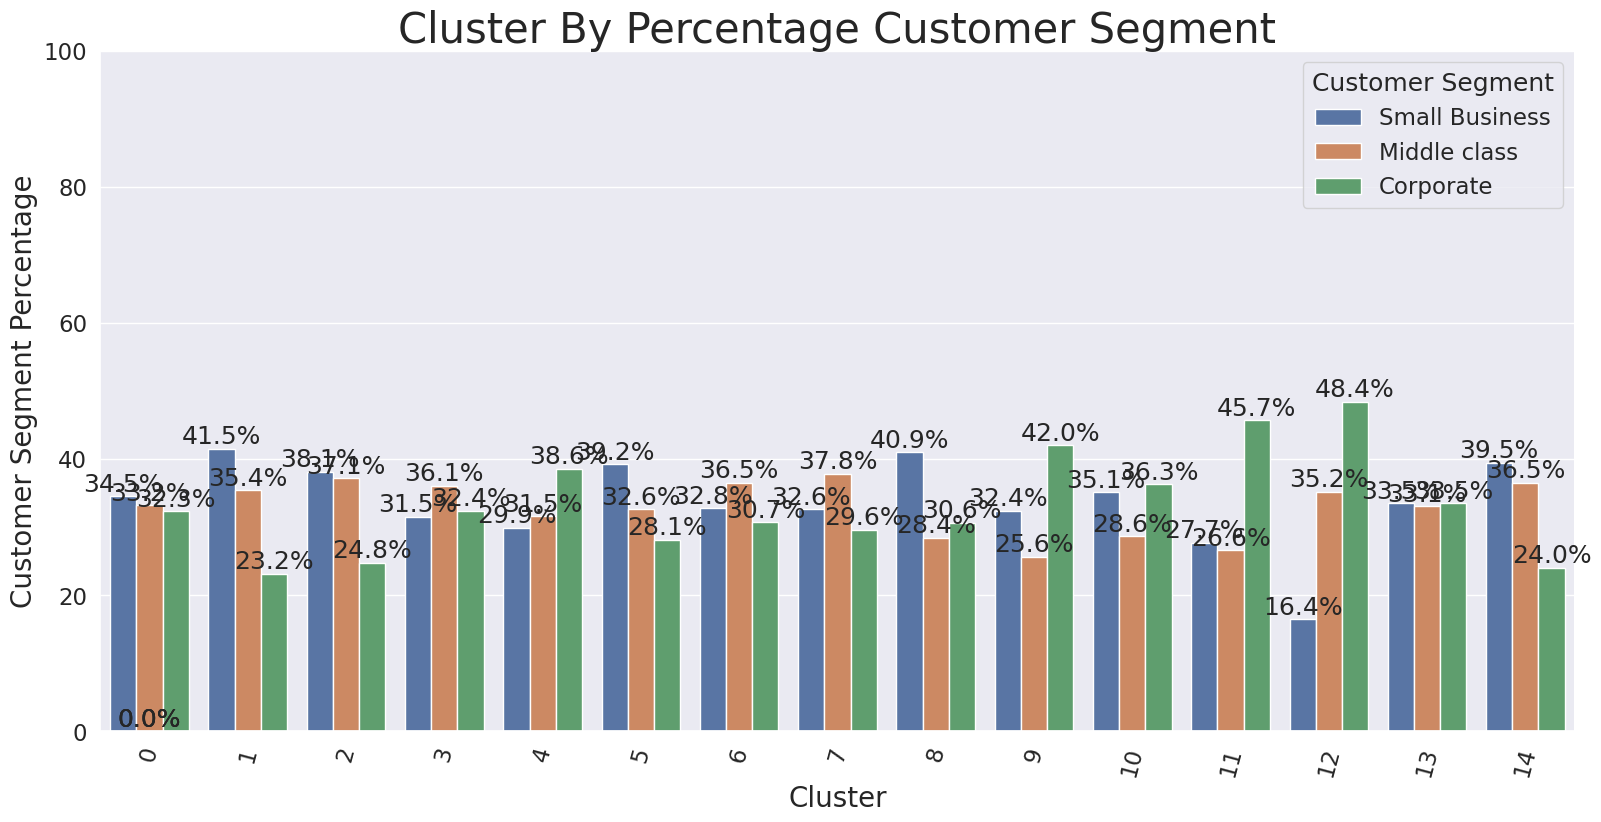

In [18]:
plotting_percentages(df_customer, 'cluster', 'Customer Segment')

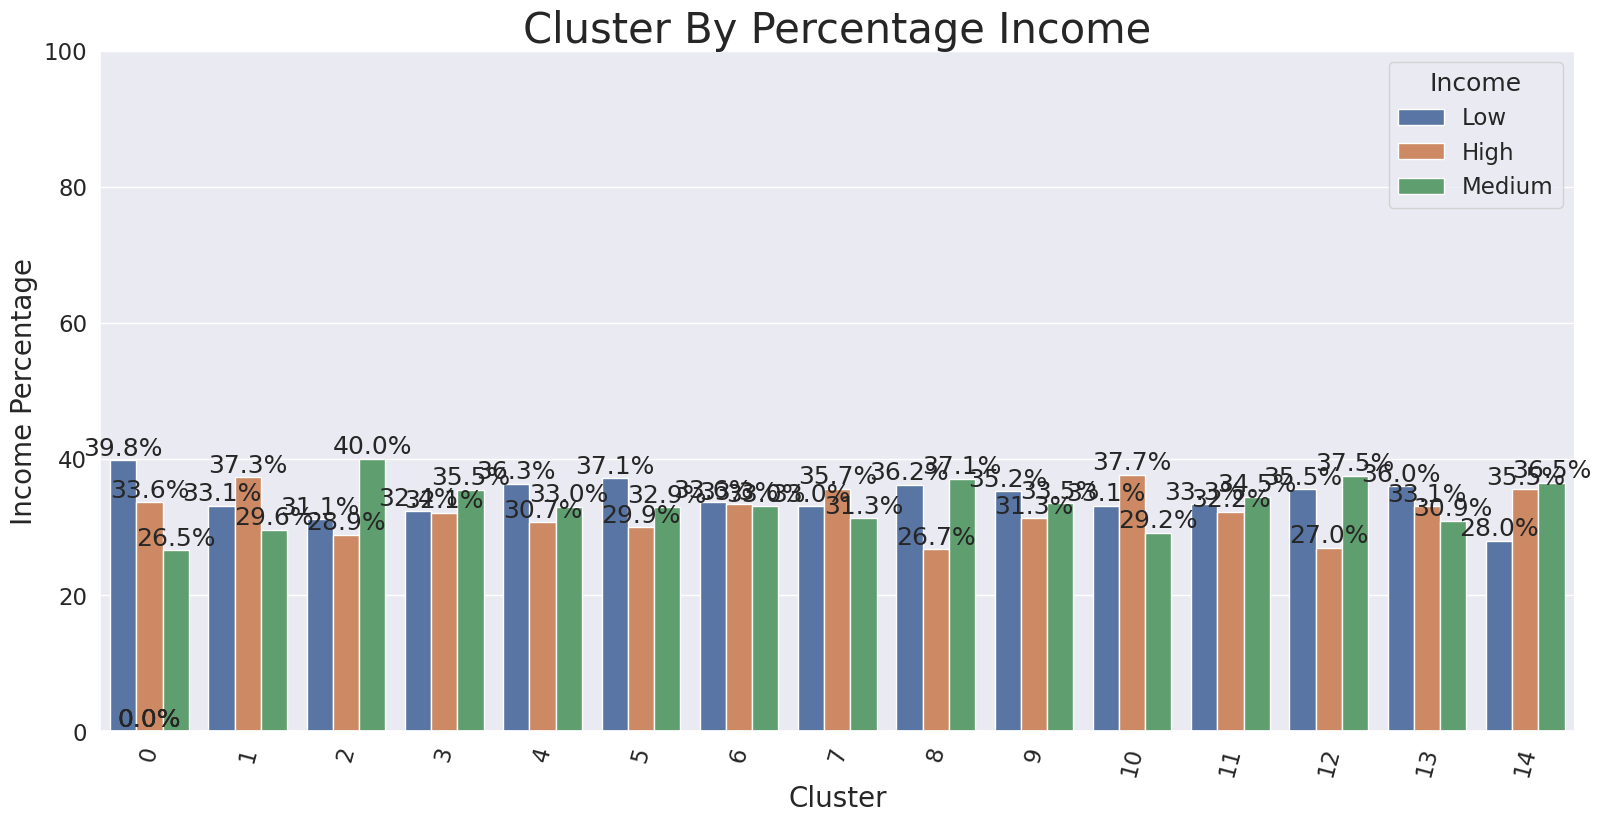

In [19]:
plotting_percentages(df_customer, 'cluster', 'Income')

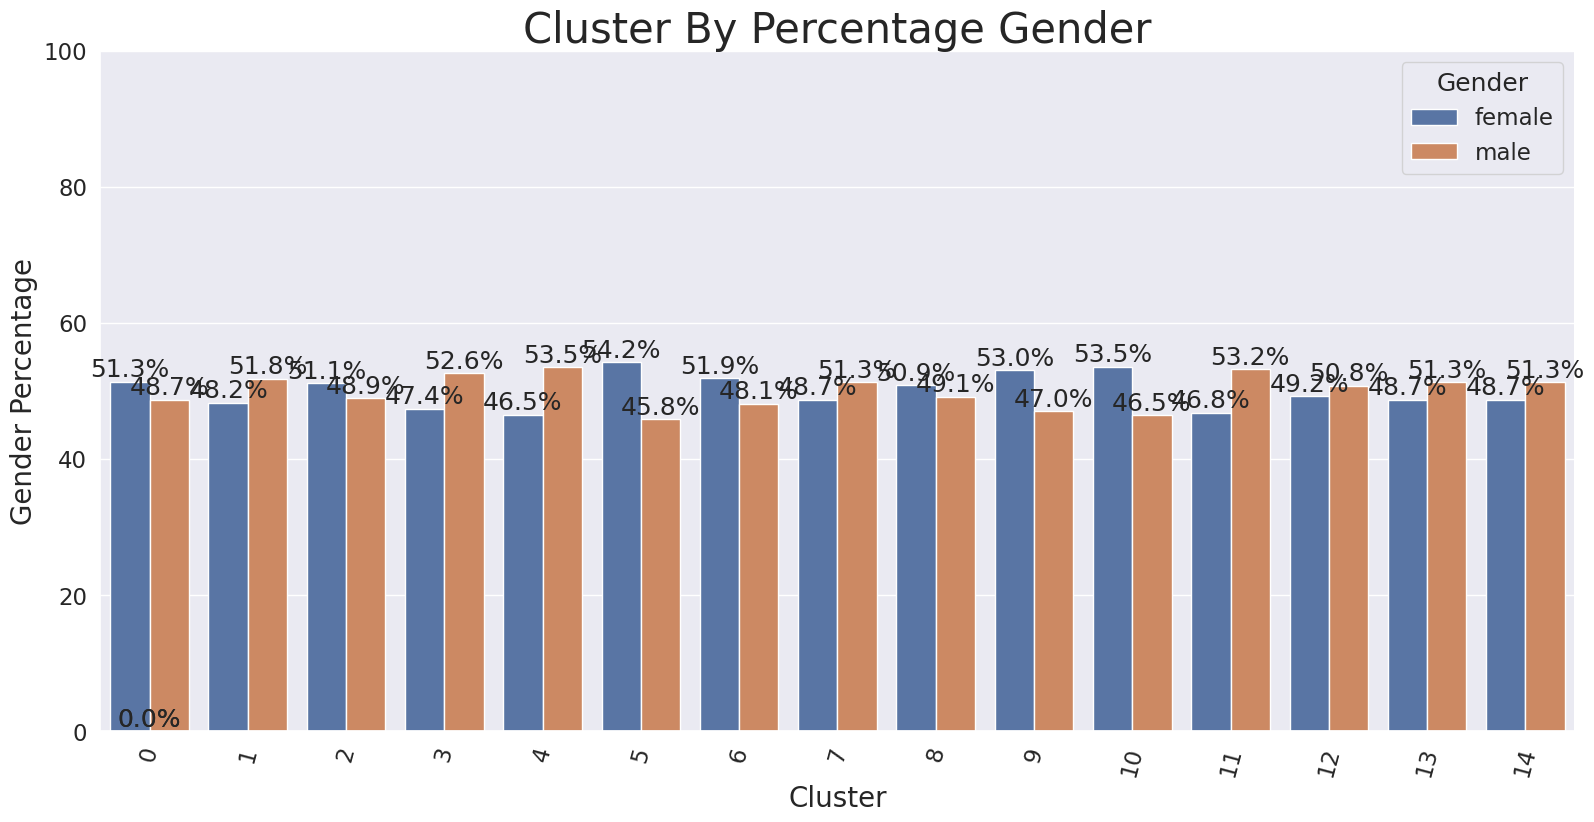

In [20]:
plotting_percentages(df_customer, 'cluster', 'Gender')

<Axes: xlabel='cluster'>

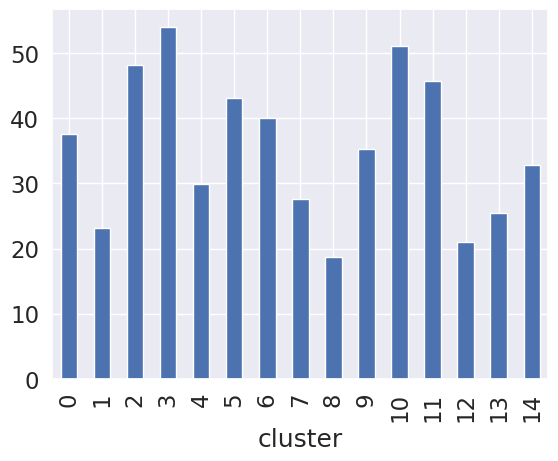

In [21]:
df_customer.groupby('cluster').Age.mean().plot(kind='bar')

In [22]:
#joining order and customer
order_cluster_mapping = pd.merge(df_order, df_customer, on='CustomerID', how='inner')[['StockCode','CustomerID','cluster']]
order_cluster_mapping

,StockCode,CustomerID,cluster
0,84029E,17850,2
1,71053,17850,2
2,21730,17850,2
3,84406B,17850,2
4,22752,17850,2
...,...,...,...
272399,21818,17666,5
272400,21817,17666,5
272401,23329,17666,5
272402,71459,17666,5


In [23]:
score_df = order_cluster_mapping.groupby(['cluster','StockCode']).count().reset_index()

score_df = score_df.rename(columns={'CustomerID':'Score'})
score_df

,cluster,StockCode,Score
0,0,10002,1
1,0,10120,1
2,0,10125,3
3,0,10133,8
4,0,10135,9
...,...,...,...
37124,14,90206C,2
37125,14,90209B,2
37126,14,C2,1
37127,14,M,11


In [24]:
missing_zero_values_table(df_product)

Your selected dataframe has 6columns and 29912Rows.
 There are 6 columns that have missing values.


,Zero Values,Missing Values,% of total values,Total Zero Missing values,% Total Zero Missing values,Data Type
StockCode,0,25954,86.8,25954,86.8,object
Product Name,0,25954,86.8,25954,86.8,object
Description,0,25954,86.8,25954,86.8,object
Brand,0,1129,3.8,1129,3.8,object
Category,0,792,2.6,792,2.6,object
Unit Price,0,118,0.4,118,0.4,float64


In [25]:
df_product = df_product.dropna()
missing_zero_values_table(df_product)

Your selected dataframe has 6columns and 3706Rows.
 There are 0 columns that have missing values.


,Zero Values,Missing Values,% of total values,Total Zero Missing values,% Total Zero Missing values,Data Type


In [26]:
#removing 'll' words
df_product['Description'] = df_product['Description'].replace({"'ll":" "}, regex=True)

df_product['Description'] = df_product['Description'].replace({"-":" "}, regex=True)

df_product['Description'] = df_product['Description'].replace({"[^A-Za-z0-9]+":""}, regex=True)



In [28]:
#convert text to features
#creating word vectors from combined frames

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer



In [29]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_product['Description'])

In [30]:
#clustering your products based on text
km_des = KMeans(n_clusters=15, init='k-means++')
clusters = km_des.fit_predict(X)

df_product['cluster'] = clusters

df_product


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,StockCode,Product Name,Description,Category,Brand,Unit Price,cluster
0,22629,Ganma Superheroes Ordinary Life Case For Samsu...,NewuniquedesigngreatgiftHighqualityplasticmate...,Cell Phones|Cellphone Accessories|Cases & Prot...,Ganma,13.99,0
1,21238,Eye Buy Express Prescription Glasses Mens Wome...,RoundedrectangularcateyereadingglassesThesefra...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,19.22,0
2,22181,MightySkins Skin Decal Wrap Compatible with Ni...,EachNintendo2DSkitisprintedwithsuperhighresolu...,Video Games|Video Game Accessories|Accessories...,Mightyskins,14.99,0
3,84879,Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...,Thesheerestcompressionstockinginitsclassisexac...,Health|Medicine Cabinet|Braces & Supports,Medi,62.38,3
4,84836,Stupell Industries Chevron Initial Wall D cor,FeaturesMadeintheUSASawtoothhangeronthebackfor...,Home Improvement|Paint|Wall Decals|All Wall De...,Stupell Industries,35.99,0
...,...,...,...,...,...,...,...
3953,84612B,Home Cardboard Flower Print Travel Memo Collec...,SpecialdesigneasytoinsertandremoveyourphotosSa...,"Arts, Crafts & Sewing|Scrapbooking|Albums & Re...",Unique Bargains,20.99,0
3954,47502,6 1/4 x 6 1/4 Gatefold Invitation - Mandarin O...,AnnounceyoureventusingaclassicGatefoldstyleinv...,Office|Envelopes & Mailing Supplies|Envelopes,Envelopes.com,55.23,0
3955,84546,"Three Things That Makes Good Coffee: Sugar, Su...",ProductFeaturesSize35inx18inColorLightpinkDeli...,Home Improvement|Paint|Wall Decals|All Wall De...,Style & Apply,39.95,0
3956,21923,Women's Breeze Walker,Suppleleatherupperswithliningthreeadjustablest...,Clothing|Shoes|Womens Shoes|All Womens Shoes,Prop?t,76.95,0


# **writing code to recommend the product based on similar items**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import pandas as pd


In [42]:
#function to find cosine similarity

def cosine_similarity_T(df, query):
    vec = TfidfVectorizer(analyzer='word', stop_words='english')
    vec_train = vec.fit_transform(df.Description)
    vec_query = vec.transform([query])

    within_cosine_similarity = []

    for i in range(len(vec_train.todense())):
        within_cosine_similarity.append(cosine_similarity(vec_train[i, :].toarray(), vec_query.toarray())[0][0])

    df['Similarity'] = within_cosine_similarity

    return df

In [43]:
def recommend_product(customer_id):
  #filter the particular customer
  cluster_score_df = score_df[score_df.cluster==order_cluster_mapping[order_cluster_mapping.CustomerID== customer_id]['cluster'].iloc[0]]

  #filtering top 5 stocks for recommendation
  top_5_non_bought = cluster_score_df[~cluster_score_df.StockCode.isin(order_cluster_mapping[order_cluster_mapping.CustomerID == customer_id]['StockCode'])].nlargest(5, 'Score')

  print('\n---- top 5 StockCode - Nonbought --------------\n')
  print(top_5_non_bought)

  print('\n-------------Recommendations Non bought ---------------\n')

  #printing product names from the product table
  print(df_product[df_product.StockCode.isin(top_5_non_bought.StockCode)]['Product Name'])

  cust_orders = df_order[df_order.CustomerID==customer_id][['CustomerID','StockCode']]

  top_orders = cust_orders.groupby(['StockCode']).count().reset_index()
  top_orders = top_orders.rename(columns={'CustomerID':'Counts'})
  top_orders['CustomerID'] = customer_id

  top_5_bought = top_orders.nlargest(5,'Counts')

  print('\n------- top 5 StockCode - bought ------------\n')
  print(top_5_bought)
  print('\n-------------Stock code Product(Bought) - Description cluster mapping ----------\n')

  top_clusters = df_product[df_product.StockCode.isin(top_5_bought.StockCode.tolist())][['StockCode','cluster']]
  print(top_clusters)

  df = df_product[df_product['cluster']==df_product[df_product.StockCode==top_clusters.StockCode.iloc[0]]['cluster'].iloc[0]]

  #df = df_product[df_product.StockCode == top_clusters.StockCode.iloc[0]['cluster'].iloc[0]]
  #query = df_product[df_product.StockCode.iloc[0]]['Description'].iloc[0]
  query = df_product[df_product.StockCode==top_clusters.StockCode.iloc[0]]['Description'].iloc[0]

  print("\nquery\n")

  print(query)

  recommendation = cosine_similarity_T(df, query)
  print(recommendation.nlargest(3,'Similarity'))




In [44]:
recommend_product(13137)


---- top 5 StockCode - Nonbought --------------

       cluster StockCode  Score
12339        4    85123A    122
11797        4     47566    115
10840        4     22423     95
9993         4     21034     62
10553        4     22077     59

-------------Recommendations Non bought ---------------

135     Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...
215     MightySkins Skin Decal Wrap Compatible with Ap...
225     Handcrafted Ercolano Music Box Featuring "Lunc...
741     3 Pack Newbee Fashion- "Butterfly" Thin Design...
1048    Port Authority K110 Dry Zone UV Micro-Mesh Pol...
Name: Product Name, dtype: object

------- top 5 StockCode - bought ------------

    StockCode  Counts  CustomerID
23      21212       5       13137
24      21213       5       13137
86      22211       5       13137
101     22379       5       13137
8       20727       4       13137

-------------Stock code Product(Bought) - Description cluster mapping ----------

     StockCode  cluster
214      21212   

<ipython-input-42-f659307715fe>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Similarity'] = within_cosine_similarity


# Clustering-Based Recommendation System

## Overview of the Process

1. **Data Preparation**: Organize and clean the data, including customer orders, product descriptions, and clustering information.
2. **Customer Clustering**: Group customers into clusters based on their purchasing behavior to identify similar customers.
3. **Score Calculation**: Assign scores to each product based on its popularity within each cluster.
4. **Recommendation**: Recommend products to a customer that they haven't bought yet but are popular among other customers in the same cluster.

## Detailed Steps

1. **Data Preparation**
   * `order_cluster_mapping`: This dataframe maps each customer ID to the cluster they belong to and the products they have bought.
   * `score_df`: This dataframe contains the score of each product in each cluster.
   * `df_product`: This dataframe contains product details such as `StockCode` and `Description`.
   * `df_order`: This dataframe contains the order details of customers.

2. **Customer Clustering**
   * Customers are grouped into clusters based on their purchase behavior using clustering algorithms like K-Means or Agglomerative Clustering. Each customer is assigned a cluster label.

3. **Score Calculation**
   * For each product, we calculate a score that represents its popularity within each cluster. This score is used to rank the products for recommendation.

4. **Recommendation Function**
   * For a given customer, we:
      1. Identify the cluster they belong to.
      2. Retrieve the top 5 products from the cluster that the customer hasn't bought yet.
      3. Recommend these products to the customer.

## Simplified Explanation

Imagine you own a bookstore and want to recommend books to your customers. Here's how you can use a clustering-based recommendation system:

1. **Group Customers by Similarity**: You notice that customers have different reading preferences. Some like science fiction, others prefer romance novels, etc. You group customers with similar preferences into clusters. For example, customers who buy a lot of science fiction books are in one cluster.

2. **Score Books**: In each cluster, you check which books are the most popular. For example, in the science fiction cluster, you see that "Dune" is bought by many customers, so it gets a high score.

3. **Recommend Books**: When a customer comes in, you see which cluster they belong to. If they haven't bought "Dune" yet and they are in the science fiction cluster, you recommend "Dune" to them.